In [ ]:
#Prophet is a library developed by Facebook that is ideal for performing time series forecasting. It is used to forecast anything that has a time series trend, such as the weather and sales.

In [ ]:
!pip install prophet

In [ ]:
#Installing and importing required dependencies
import pandas as pd
from prophet import Prophet

In [ ]:
dataframe = pd.read_csv('/content/sample_data/transactions.csv')

In [ ]:
dataframe.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
dataframe.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [ ]:
#Data preprocessing
#Using the Pandas to_datetime() function, we will convert the date column from a string to a date-time format.
dataframe ['date'] = pd.to_datetime(dataframe ['date'])
dataframe.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

In [ ]:
#We need to drop the store_nbr column. Besides, for this data to work with the Prophet model, we only need two columns, i.e, a ds and y column. We need to rename our date column to ds and the transactions column to y.
dataframe.drop('store_nbr', axis=1, inplace=True)

In [ ]:
dataframe.columns = ['ds', 'y']
dataframe.head()

,ds,y
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922


In [ ]:
#Training the time series model
p = Prophet(interval_width=0.92, daily_seasonality=True)
model = p.fit(dataframe)

In [ ]:
#Making predictions and evaluating performance
future = p.make_future_dataframe(periods=200, freq='D')
future.tail()

,ds
1877,2018-02-27
1878,2018-02-28
1879,2018-03-01
1880,2018-03-02
1881,2018-03-03


In [ ]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1877,2018-02-27,991.285499,-115.258591,3262.413455,967.556240,1015.866424,601.615027,601.615027,601.615027,740.170634,...,-95.387467,-95.387467,-95.387467,-43.168140,-43.168140,-43.168140,0.0,0.0,0.0,1592.900525
1878,2018-02-28,991.453364,-70.230859,3443.410088,967.460454,1016.243679,628.529528,628.529528,628.529528,740.170634,...,-72.438868,-72.438868,-72.438868,-39.202238,-39.202238,-39.202238,0.0,0.0,0.0,1619.982892
1879,2018-03-01,991.621229,-94.985972,3257.116881,967.469645,1016.665234,561.864618,561.864618,561.864618,740.170634,...,-143.623179,-143.623179,-143.623179,-34.682837,-34.682837,-34.682837,0.0,0.0,0.0,1553.485847
1880,2018-03-02,991.789094,72.440847,3254.467760,967.528726,1017.093027,670.907080,670.907080,670.907080,740.170634,...,-39.479703,-39.479703,-39.479703,-29.783851,-29.783851,-29.783851,0.0,0.0,0.0,1662.696174
1881,2018-03-03,991.956959,325.540362,3627.168399,967.494028,1017.515439,971.399474,971.399474,971.399474,740.170634,...,255.915606,255.915606,255.915606,-24.686766,-24.686766,-24.686766,0.0,0.0,0.0,1963.356433


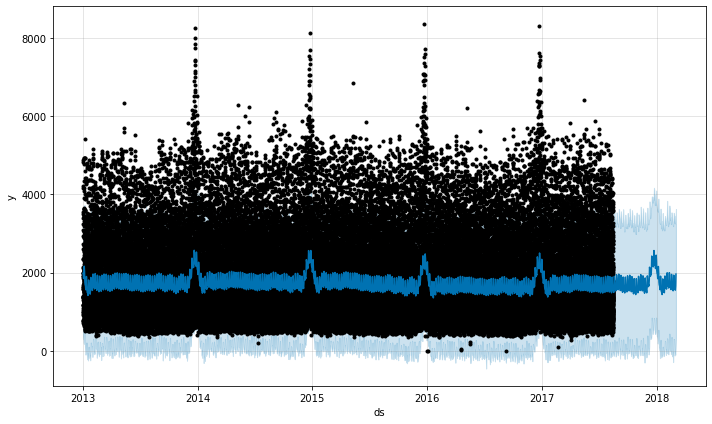

In [ ]:
#visualize these predictions
plot1 = p.plot(forecast_prediction)

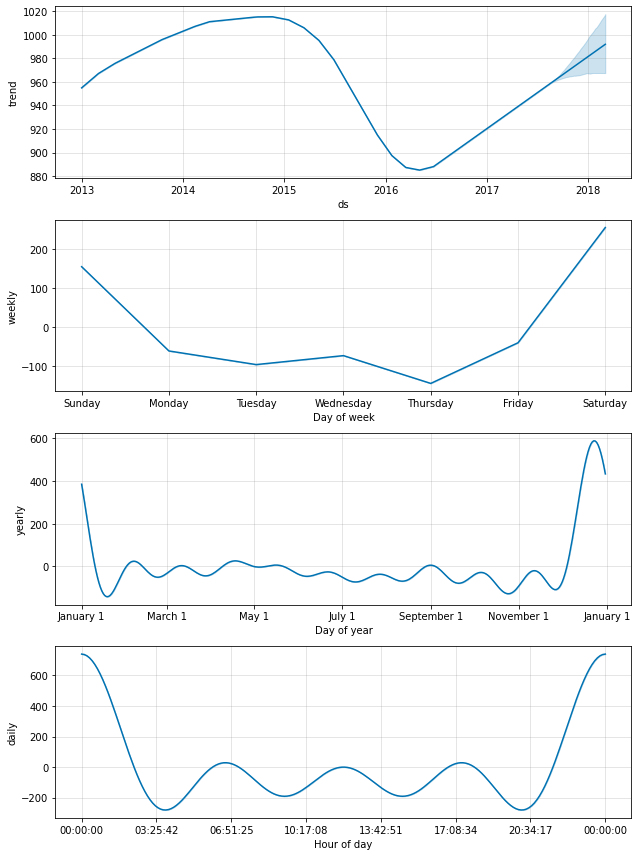

In [ ]:
plot2 = p.plot_components(forecast_prediction)

That’s sales forecasting using the Prophet model in a nutshell.